### Electronics - Train with larger LM
Here, we are training the LM with 19K (strictly speaking, 80% thereof) in hopes that this will ultimately improve the classifier accuracy.

In [1]:
#hide
!pip install -Uqq fastbook
import fastbook
fastbook.setup_book()

In [2]:
#hide
from fastbook import *
from IPython.display import display,HTML
from fastai.text.all import *

In [3]:
import pandas as pd
import time

In [4]:
lm_path = Path("electronics_all_classifier_data_unbalanced_uniq.csv") 
# Data prep for this is done in the workbooks Dataprep and Dataprep2

In [5]:
lm_df = pd.read_csv(lm_path)

In [6]:
lm_df.shape

(19009, 8)

In [8]:
lm_df.head()

,helpful,reviewText,overall,summary,num_helpful_votes,num_total_votes,helpful_ratio,is_helpful
0,"[70, 92]","I purchased this mount for my 37 inch LCD TV. Installation was easy... The trouble I encountered was due to a bad wall stud finder. Make sure you have one when you install this mount because you need to screw the mount into a wall stud or at least have one screw into a wall stud.The arm of the mount sags after I hooked up my 37in. LCD TV to the mount. My TV is within the weight limit of this mount (less than 55lbs.) but the arm still sags due to the weight of the TV. I guess as long as it supports my TV, the sagging shouldn't be an issue. It just looks funny from the side. I do retr...",3.0,It Works But Could Be Better,70,92,0.760870,1.0
1,"[52, 57]","Update 2-Sep-13:Put on CM 10.2.2 (Android 4.2.2) last week. I've got to say, it's nice. Fonts are small, though one could choose dpi if they had visual issues (google this). Netflix works, and the UI is really quite nice - pretty much no need for Button Savior, battery life is same as CM7. In general I like it better than CM7. My major hardware dislikes are headphone jack requires a little wiggling sometimes, no BT, no GPS. Seems to charge fine with a normal cable.At this point I lean toward Samsung tablets - I like the IR and the microSD slot.===========================Update Jul 20...",1.0,Very Limited Unless You Modify It,52,57,0.912281,1.0
2,"[69, 72]","I've owned an Ipad 2, an original Kindle Fire, and first generation 3g dual screen Nook. I decided it was time to upgrade my original Nook and went with this tablet. I purchased mine direct from B&N. This is a fantastic ereader with a few tablet functions. I really like the interface on this ereader more so than the Kindle Fire. Don't get me wrong, the Kindle Fire is a very nice device, but I like the personal touch I can give the Nook HD. It's more customizable.I can create my own wallpaper and customize my home screen. The ereader is very light and easy to hold with a contoured, grippy b...",5.0,Great little device!,69,72,0.958333,1.0
3,"[48, 54]","I tried Kindle hd, Samsung tab 2, and Nexus 7. I returned them all since I had high standard for display quality of tablets. I was very disappointed by their color faithfulness and/or resolution.One day I saw a hot discussion online about discounted nook hd from Staples. I rushed to a local store and played nook hd. Its screen immediately attracted me: bright, white, colorful, high resolution. This is what I want!I have being enjoying nook hd ever since. It has THE BEST SCREEN period!Online community like XDA forum has ways to root nook hd and install Android by yourself. I rooted mine an...",4.0,"best screen out of all 7"" tablets",48,54,0.888889,1.0
4,"[226, 231]","The Nook tablet is a great color e-reader with the ""bonus"" of being able to read your email, shop on Amazon.com, surf the web, watch tv shows on Hulu Plus, movies on Netflix, and listen to the world's largest selection of music on Pandora Radio. I added a 16gb sd card filled with thousands of my favorite songs. But, the Nook is designed to be an ereader...it is not a games tablet, or an IPad.I got my Nook Tablet (8gb version) from Barnes & Noble because of the extra discount I got with my B&N; membership...the price was MUCH less than advertised by most internet venders. I already have a ...",5.0,Great Color E-Reader With Extra Features,226,231,0.978355,1.0


In [9]:
lm_df.drop(columns=["helpful", "overall", "summary", "num_helpful_votes", "num_total_votes","helpful_ratio","is_helpful"], inplace=True)

In [10]:
lm_df.head()

,reviewText
0,"I purchased this mount for my 37 inch LCD TV. Installation was easy... The trouble I encountered was due to a bad wall stud finder. Make sure you have one when you install this mount because you need to screw the mount into a wall stud or at least have one screw into a wall stud.The arm of the mount sags after I hooked up my 37in. LCD TV to the mount. My TV is within the weight limit of this mount (less than 55lbs.) but the arm still sags due to the weight of the TV. I guess as long as it supports my TV, the sagging shouldn't be an issue. It just looks funny from the side. I do retr..."
1,"Update 2-Sep-13:Put on CM 10.2.2 (Android 4.2.2) last week. I've got to say, it's nice. Fonts are small, though one could choose dpi if they had visual issues (google this). Netflix works, and the UI is really quite nice - pretty much no need for Button Savior, battery life is same as CM7. In general I like it better than CM7. My major hardware dislikes are headphone jack requires a little wiggling sometimes, no BT, no GPS. Seems to charge fine with a normal cable.At this point I lean toward Samsung tablets - I like the IR and the microSD slot.===========================Update Jul 20..."
2,"I've owned an Ipad 2, an original Kindle Fire, and first generation 3g dual screen Nook. I decided it was time to upgrade my original Nook and went with this tablet. I purchased mine direct from B&N. This is a fantastic ereader with a few tablet functions. I really like the interface on this ereader more so than the Kindle Fire. Don't get me wrong, the Kindle Fire is a very nice device, but I like the personal touch I can give the Nook HD. It's more customizable.I can create my own wallpaper and customize my home screen. The ereader is very light and easy to hold with a contoured, grippy b..."
3,"I tried Kindle hd, Samsung tab 2, and Nexus 7. I returned them all since I had high standard for display quality of tablets. I was very disappointed by their color faithfulness and/or resolution.One day I saw a hot discussion online about discounted nook hd from Staples. I rushed to a local store and played nook hd. Its screen immediately attracted me: bright, white, colorful, high resolution. This is what I want!I have being enjoying nook hd ever since. It has THE BEST SCREEN period!Online community like XDA forum has ways to root nook hd and install Android by yourself. I rooted mine an..."
4,"The Nook tablet is a great color e-reader with the ""bonus"" of being able to read your email, shop on Amazon.com, surf the web, watch tv shows on Hulu Plus, movies on Netflix, and listen to the world's largest selection of music on Pandora Radio. I added a 16gb sd card filled with thousands of my favorite songs. But, the Nook is designed to be an ereader...it is not a games tablet, or an IPad.I got my Nook Tablet (8gb version) from Barnes & Noble because of the extra discount I got with my B&N; membership...the price was MUCH less than advertised by most internet venders. I already have a ..."


In [12]:
start = time.time()

dls_lm = TextDataLoaders.from_df(lm_df, dtype=object,
                                valid_pct = 0.20,
                                bs = 64,
                                is_lm = True)
end = time.time()
elapsed = end - start
print("TextDataLoader took this long: ", elapsed)

/opt/conda/envs/fastai/lib/python3.8/site-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)


TextDataLoader took this long:  44.40907526016235


get_files = partial(get_text_files, folders=['train', 'test'])

dls_lm = DataBlock(
    blocks=TextBlock.from_folder(path, is_lm=True),
    get_items=get_files, splitter=RandomSplitter(0.1)
).dataloaders(path, path=path, bs=128, seq_len=80)

In [13]:
dls_lm.show_batch(max_n=3)

,text,text_
0,"xxbos xxmaj when i bought this , i wanted something which would basically replace my old , dead xxup vcr , but do it all with xxup dvd media , not outdated xxup vhs tapes , and that meant a xxup dvd recorder . xxmaj after doing my research and noting that this item seemed to fit my needs and wants , and while i can surely say that i had some","xxmaj when i bought this , i wanted something which would basically replace my old , dead xxup vcr , but do it all with xxup dvd media , not outdated xxup vhs tapes , and that meant a xxup dvd recorder . xxmaj after doing my research and noting that this item seemed to fit my needs and wants , and while i can surely say that i had some early"
1,know if that is from me not using it correctly or what . xxmaj there is a built in light so you ca n't be sneaky with it in low light conditions . i would spend the extra money for the 20 over the 10 for the color view finder and other options . i ultimately did n't go with the xxmaj sony xxup trv 38 because of canon quality and recent,if that is from me not using it correctly or what . xxmaj there is a built in light so you ca n't be sneaky with it in low light conditions . i would spend the extra money for the 20 over the 10 for the color view finder and other options . i ultimately did n't go with the xxmaj sony xxup trv 38 because of canon quality and recent things
2,"where i only need to take some xxunk . xxmaj runs xxmaj windows 8 ( june xxmaj preview edition ) perfectly . i scratch - loaded xxmaj windows 8 , and while it takes some patience to get all the xxmaj windows 7 drivers and utilities installed on xxmaj windows 8 , everything works xxunk you may not love as much:1 . xxmaj there 's a downside to making a laptop that","i only need to take some xxunk . xxmaj runs xxmaj windows 8 ( june xxmaj preview edition ) perfectly . i scratch - loaded xxmaj windows 8 , and while it takes some patience to get all the xxmaj windows 7 drivers and utilities installed on xxmaj windows 8 , everything works xxunk you may not love as much:1 . xxmaj there 's a downside to making a laptop that 's"


In [15]:
learn = language_model_learner(
    dls_lm, AWD_LSTM, drop_mult=0.3, 
    metrics=[accuracy, Perplexity()])

In [16]:
import time

In [17]:
start = time.time()
learn.fit_one_cycle(4, 2e-2)
end = time.time()
elapsed = end - start
print(elapsed)

epoch,train_loss,valid_loss,accuracy,perplexity,time
0,4.188231,4.184806,0.252066,65.680779,12:44
1,4.132305,4.071600,0.260399,58.650753,14:25
2,3.944868,3.931675,0.274083,50.992302,12:21
3,3.761071,3.882766,0.279602,48.558342,12:08


3099.968159198761


In [18]:
learn.save_encoder('LM_4ep_2e-2_19K')

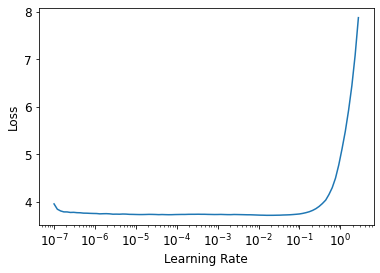

In [19]:
lr_min,lr_steep = learn.lr_find()

In [20]:
start = time.time()
learn.unfreeze()
learn.fit_one_cycle(1, 2e-3)
end = time.time()
elapsed = end - start
print(elapsed)

epoch,train_loss,valid_loss,accuracy,perplexity,time
0,3.586837,3.681459,0.305534,39.704269,13:26


806.3527421951294


#### About the language model above
This one is now trained with 19K reviews.

In [21]:
learn.save_encoder('LM_4ep_2e-2_1ep_2e-3_19K')

In [22]:
start = time.time()
learn.unfreeze()
learn.fit_one_cycle(1, 2e-3)
end = time.time()
elapsed = end - start
print(elapsed)

epoch,train_loss,valid_loss,accuracy,perplexity,time
0,3.467038,3.645689,0.310523,38.309177,13:33


813.2776732444763


In [16]:
path = Path('data')

In [17]:
dls_clas = DataBlock(
    blocks=(TextBlock.from_folder(path, vocab=dls_lm.vocab),CategoryBlock),
    get_y = parent_label,
    get_items=partial(get_text_files, folders=['train', 'test']),
    splitter=GrandparentSplitter(valid_name='test')
).dataloaders(path, path=path, bs=128, seq_len=72)

In [18]:
dls_clas.show_batch(max_n=4)

,text,category
0,"xxbos xxmaj having had a chance to spend a little time with a review model gives me a chance to share the experience with you a bit early ( before my own arrives ) . xxmaj i 'll take you hands - on with the new model , plus xxmaj i 'll share from my past two years of ipod touch ownership altogether , especially for those who have n't yet owned ( or been owned by ) one of these mobile xxunk also hidden a treasure trove of info on how you can legitimately download tons of quality apps for free . xxmaj first though , let 's quickly cover what 's xxunk xxmaj faster 1ghz xxup a4 xxmaj processor - to keep up with the high demands of multitasking+ xxmaj ultra high resolution "" retina display "" - packs a 960 x 640 resolution at 326 pixels per",helpful
1,"xxbos performancethe ( high definition ) xxmaj blu - ray movies played on the xxup db - d5500 are fabulous . ( standard low definition ) dvds are much clearer than played on my old xxup dvd player . xxmaj nothing more needs to be xxunk / xxup cons1 ) xxmaj the xxup bd - d5500 has a loading tray , which encourages proper handling of the disks by the edges . ( many more expensive players are "" slot xxunk ) xxmaj despite the complaint of one reviewer , it is the standard width ( 17 "" ) , exactly the same as my old xxup dvd player and my receiver.3 ) xxmaj the controls are illuminated , and so , easy to operate even in a dark room , but the controls are identified only by symbols . xxmaj seeing in the dark is good , feeling in",helpful
2,"xxbos xxup xxunk / 27 / 2012so i came back from xxmaj galaxy xxmaj note 10.1 because i just could not tolerate non - full xxup hd screen any more after using xxmaj infinity . i tried to convince myself it would be ok , but it was n't . xxmaj the biggest concern coming back to infinity were relatively frequent application not responding error ( anr ) and random application crash / close especially on browser , and relatively but significantly slower speed of browser page loading compared to ipad 2 or xxmaj galaxy xxmaj note 10.1 . xxmaj however , with a little tweaks i am now very satisfied with infinity as those concerns are now significantly improved to almost completely xxunk xxmaj see xxmaj stability section for added xxmaj xxunk xxmaj conclusion xxunk / 31 / 2012- xxmaj wifi related battery issue is not unit based ,",helpful
3,"xxbos xxup update 3 / 22 / 13 : xxmaj i 've used this recorder now to make hundreds of audio recordings . xxmaj its batteries have gone out many times , due to so much use . xxmaj only once did i lose some of the recording , and that only a tiny part at the end . xxmaj the sound clarity is good , even on the smallest file settings ( like 48kbps ) . xxmaj am really surprised . xxmaj initial review , follows below the line . xxrep 27 - xxup upshot : right now as i type , this is the lowest - priced and best xxmaj olympus recorder in xxmaj amazon - if you buy it from xxmaj amazon . xxmaj there are other sellers of this unit advertising via xxmaj amazon who sell the 702pc for up to twice what i just paid",helpful


In [36]:
learn = text_classifier_learner(dls_clas, AWD_LSTM, drop_mult=0.5, 
                                metrics=accuracy).to_fp16()

In [37]:
learn = learn.load_encoder('LM_4ep_2e-2_1ep_2e-3_19K')

Note that we overwrote "learn" so I can now use it for the classifier, not the LM. hahaha.

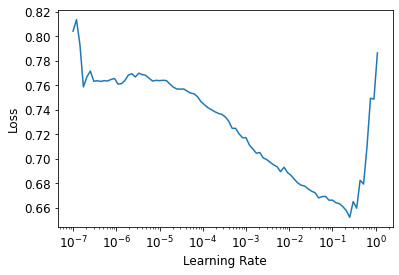

In [38]:
lr_min,lr_steep = learn.lr_find()

In [39]:
learn.fit_one_cycle(1, 1e-3)

epoch,train_loss,valid_loss,accuracy,time
0,0.650181,0.608985,0.716418,00:20


In [40]:
learn.freeze_to(-2)
learn.fit_one_cycle(2, slice(1e-3/(2.6**4),1e-3))

epoch,train_loss,valid_loss,accuracy,time
0,0.572791,0.559885,0.748756,00:22
1,0.548128,0.536841,0.747512,00:22


In [41]:
learn.freeze_to(-3)
learn.fit_one_cycle(1, slice(1e-3/(2.6**4),1e-3))

epoch,train_loss,valid_loss,accuracy,time
0,0.531927,0.505913,0.758706,00:32


In [42]:
learn.freeze_to(-3)
learn.fit_one_cycle(1, slice(1e-3/(2.6**4),1e-3))

epoch,train_loss,valid_loss,accuracy,time
0,0.518763,0.520130,0.759950,00:32


In [43]:
learn.unfreeze()
learn.fit_one_cycle(1, slice(1e-3/(2.6**4),1e-3))

epoch,train_loss,valid_loss,accuracy,time
0,0.502847,0.520784,0.758706,00:40


In [44]:
learn.unfreeze()
learn.fit_one_cycle(1, slice(1e-3/(2.6**4),1e-3))

epoch,train_loss,valid_loss,accuracy,time
0,0.469090,0.520122,0.750000,00:40


In [35]:
learn.unfreeze()
learn.fit_one_cycle(1, slice(1e-3/(2.6**4),1e-3))

epoch,train_loss,valid_loss,accuracy,time
0,0.522873,0.524226,0.751244,00:40


sVery interesting but a little disappointing as I'm clearly overfitting.This is my second attempt, and I decided on a smaller learning rate here (1e-3 consistently) but this looks still like overfitting.

In [45]:
learn.save_encoder('CL_5ep_1e-3_4K')